# Chargement des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mylib.fonction_exploration import exploration1, exploration2, exploration3, exploration4
from mylib.fonction_pk import test_pk
from mylib.fonction_merge import df_merge
from mylib.fonction_acp import display_circles, display_factorial_planes, display_scree_plot
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
from IPython.display import display_html 

from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
#from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
red = "\033[31m"
end = "\033[0;0m"

chemin = '../src/df_2011_cleaned.csv'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Chargement du fichier nettoyé

In [2]:
p9 = pd.read_csv(chemin)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploration

In [4]:
exploration1(p9)

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
0,AFG,Afghanistan,29249157,20.200000,0.456000,3.167000,47.760000,0,1791000000,82000000,157000000,48.000000,6.950000,5500.665000,1749.936995,12.916717,-75000000,13.472534,361.764706
1,ZAF,South Africa,52443325,3.800000,0.686000,2.312000,177.920000,1,15414000000,2969000000,405000000,92.000000,7.110000,8769.679000,13281.503894,4.894844,2564000000,115.997291,4.922280
2,ALB,Albania,2905195,5.400000,0.766000,1.907000,306.840000,1,1561000000,42000000,89000000,14.000000,2.150000,1499.451000,10203.120049,-2.182546,-47000000,230.473330,-29.365079
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
142,ECU,Ecuador,15237728,8.400000,0.743000,2.219000,89.930000,0,1855000000,155000000,695000000,96.000000,7.440000,9561.102000,9861.503581,6.917657,-540000000,31.807309,8.087092
143,USA,United States,311583481,2.500000,0.913000,2.257000,186.170000,1,388888000000,55441000000,11964000000,1.500000,3.030000,7456.767000,50065.966504,3.436654,43477000000,1061.932110,6.167362
144,ETH,Ethiopia,91817929,20.900000,0.422000,2.533000,106.380000,1,11900000000,410000000,96000000,56.913460,18.220000,5368.907000,1114.045972,11.978294,314000000,23.224317,-16.521739
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
132,TUR,Turkiye,74173854,2.500000,0.762000,2.439000,316.950000,1,37718000000,2016000000,917000000,9.750000,2.420000,2477.965000,19604.097714,5.257620,1099000000,191.558025,12.102689
74,MDG,Madagascar,22348158,27.300000,0.494000,2.280000,213.080000,1,5805000000,42000000,27000000,93.818180,10.930000,8581.841000,1506.468000,12.161632,15000000,46.672951,42.105263


In [5]:
exploration2(p9)

,Nombre de valeurs totales,Type des données,Nombre de NaN,NaN en %,Nombre de valeurs uniques,Valeurs uniques en%
iso,145,object,0,0.00,145,100.00
Country,145,object,0,0.00,145,100.00
Population,145,int64,0,0.00,145,100.00
Under-nourishment (%),145,float64,0,0.00,83,57.24
HDI,145,float64,0,0.00,127,87.59
Peace_index,145,float64,0,0.00,141,97.24
Vegetables disponibility (kg/cap/year),145,float64,0,0.00,145,100.00
Enough veg intake (> 91.25 kg/cap/year),145,int64,0,0.00,2,1.38
Production,145,int64,0,0.00,145,100.00
Exportations,145,int64,0,0.00,105,72.41


In [6]:
exploration3(p9)


---------------------------------------
Nombre de lignes et de colonnes (shape)
--------------------------------------- 

(145, 19) 

--------------------------------------
Affichage des NaN (isna().any(axis=1))
-------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-nourishment (%), HDI, Peace_index, Vegetables disponibility (kg/cap/year), Enough veg intake (> 91.25 kg/cap/year), Production, Exportations, Importations, Customs duration (h), Customs tax (%), Distance (km), Gdp/cap, Population evolution (4y, %), Trade balance (exp-imp), Self-sufficiency (prod-dispo), Market growth (2y, %)]
Index: [] 

---------------------------------------
Nombre de doublons (duplicated().sum())
--------------------------------------- 

0 

-----------------------------------------------------
Affichage des doublons (df[df.duplicated()].head(10))
----------------------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-

In [7]:
exploration4(p9)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iso,145,145,AFG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,145,145,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,145.00,NaN,NaN,NaN,47051183.13,156390808.38,319014.00,4584216.00,10557560.00,32903699.00,1345035000.00
Under-nourishment (%),145.00,NaN,NaN,NaN,9.55,8.91,2.50,2.50,6.10,13.40,44.00
HDI,145.00,NaN,NaN,NaN,0.69,0.16,0.35,0.55,0.73,0.83,0.94
Peace_index,145.00,NaN,NaN,NaN,2.05,0.42,1.08,1.75,2.05,2.28,3.17
Vegetables disponibility (kg/cap/year),145.00,NaN,NaN,NaN,191.89,92.33,44.00,127.63,172.81,244.90,490.27
Enough veg intake (> 91.25 kg/cap/year),145.00,NaN,NaN,NaN,0.88,0.33,0.00,1.00,1.00,1.00,1.00
Production,145.00,NaN,NaN,NaN,19327220689.66,82946478079.53,16000000.00,1088000000.00,2833000000.00,10476000000.00,897785000000.00
Exportations,145.00,NaN,NaN,NaN,1724317241.38,5533691750.07,0.00,10000000.00,128000000.00,765000000.00,55441000000.00


In [8]:
p9.sample()

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
104,PER,Peru,29477721,7.70,0.73,2.14,206.70,1,10239000000,653000000,2033000000,48.00,3.12,10147.58,10400.95,3.07,-1380000000,140.65,1.04


# Vérification des outliers en prévision de l'ACP

In [9]:
# on détermine les colonnes numériques
num = []
for i in p9.columns:
    if p9[i].dtypes == int or p9[i].dtypes == float:
        num.append(i)

## Z-score

In [10]:
# on calcule le z-score sur toutes les variables numériques
for i in num:
    p9.sort_values(by=i, inplace=True)
    outlier_z = p9[stats.zscore(p9[i]) > 1.96]
    nb_outlier_z = len(outlier_z)
    print(bold + f"\n{i} : {nb_outlier_z} outliers \n\n" + end + f"{outlier_z[['Country', i]]} \n" + "-" * 50)


Population : 2 outliers 

   Country  Population
53   India  1257621191
26   China  1345035000 
--------------------------------------------------

Under-nourishment (%) : 9 outliers 

                      Country  Under-nourishment (%)
74                 Madagascar                  27.30
137               Yemen, Rep.                  29.10
127               Timor-Leste                  29.30
108  Central African Republic                  29.60
107                    Rwanda                  34.30
112          Congo, Dem. Rep.                  34.50
71                    Liberia                  35.70
29                Congo, Rep.                  35.90
50                      Haiti                  44.00 
--------------------------------------------------

HDI : 0 outliers 

Empty DataFrame
Columns: [Country, HDI]
Index: [] 
--------------------------------------------------

Peace_index : 5 outliers 

                Country  Peace_index
58               Israel         2.93
112    C

## Log

In [11]:
p9_log = p9.copy()
p9_log = p9_log.set_index(['Country'])
p9_log = p9_log[num]
p9_log.sample()

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Afghanistan,29249157,20.20,0.46,3.17,47.76,0,1791000000,82000000,157000000,48.00,6.95,5500.66,1749.94,12.92,-75000000,13.47,361.76


### Graphiques de distribution

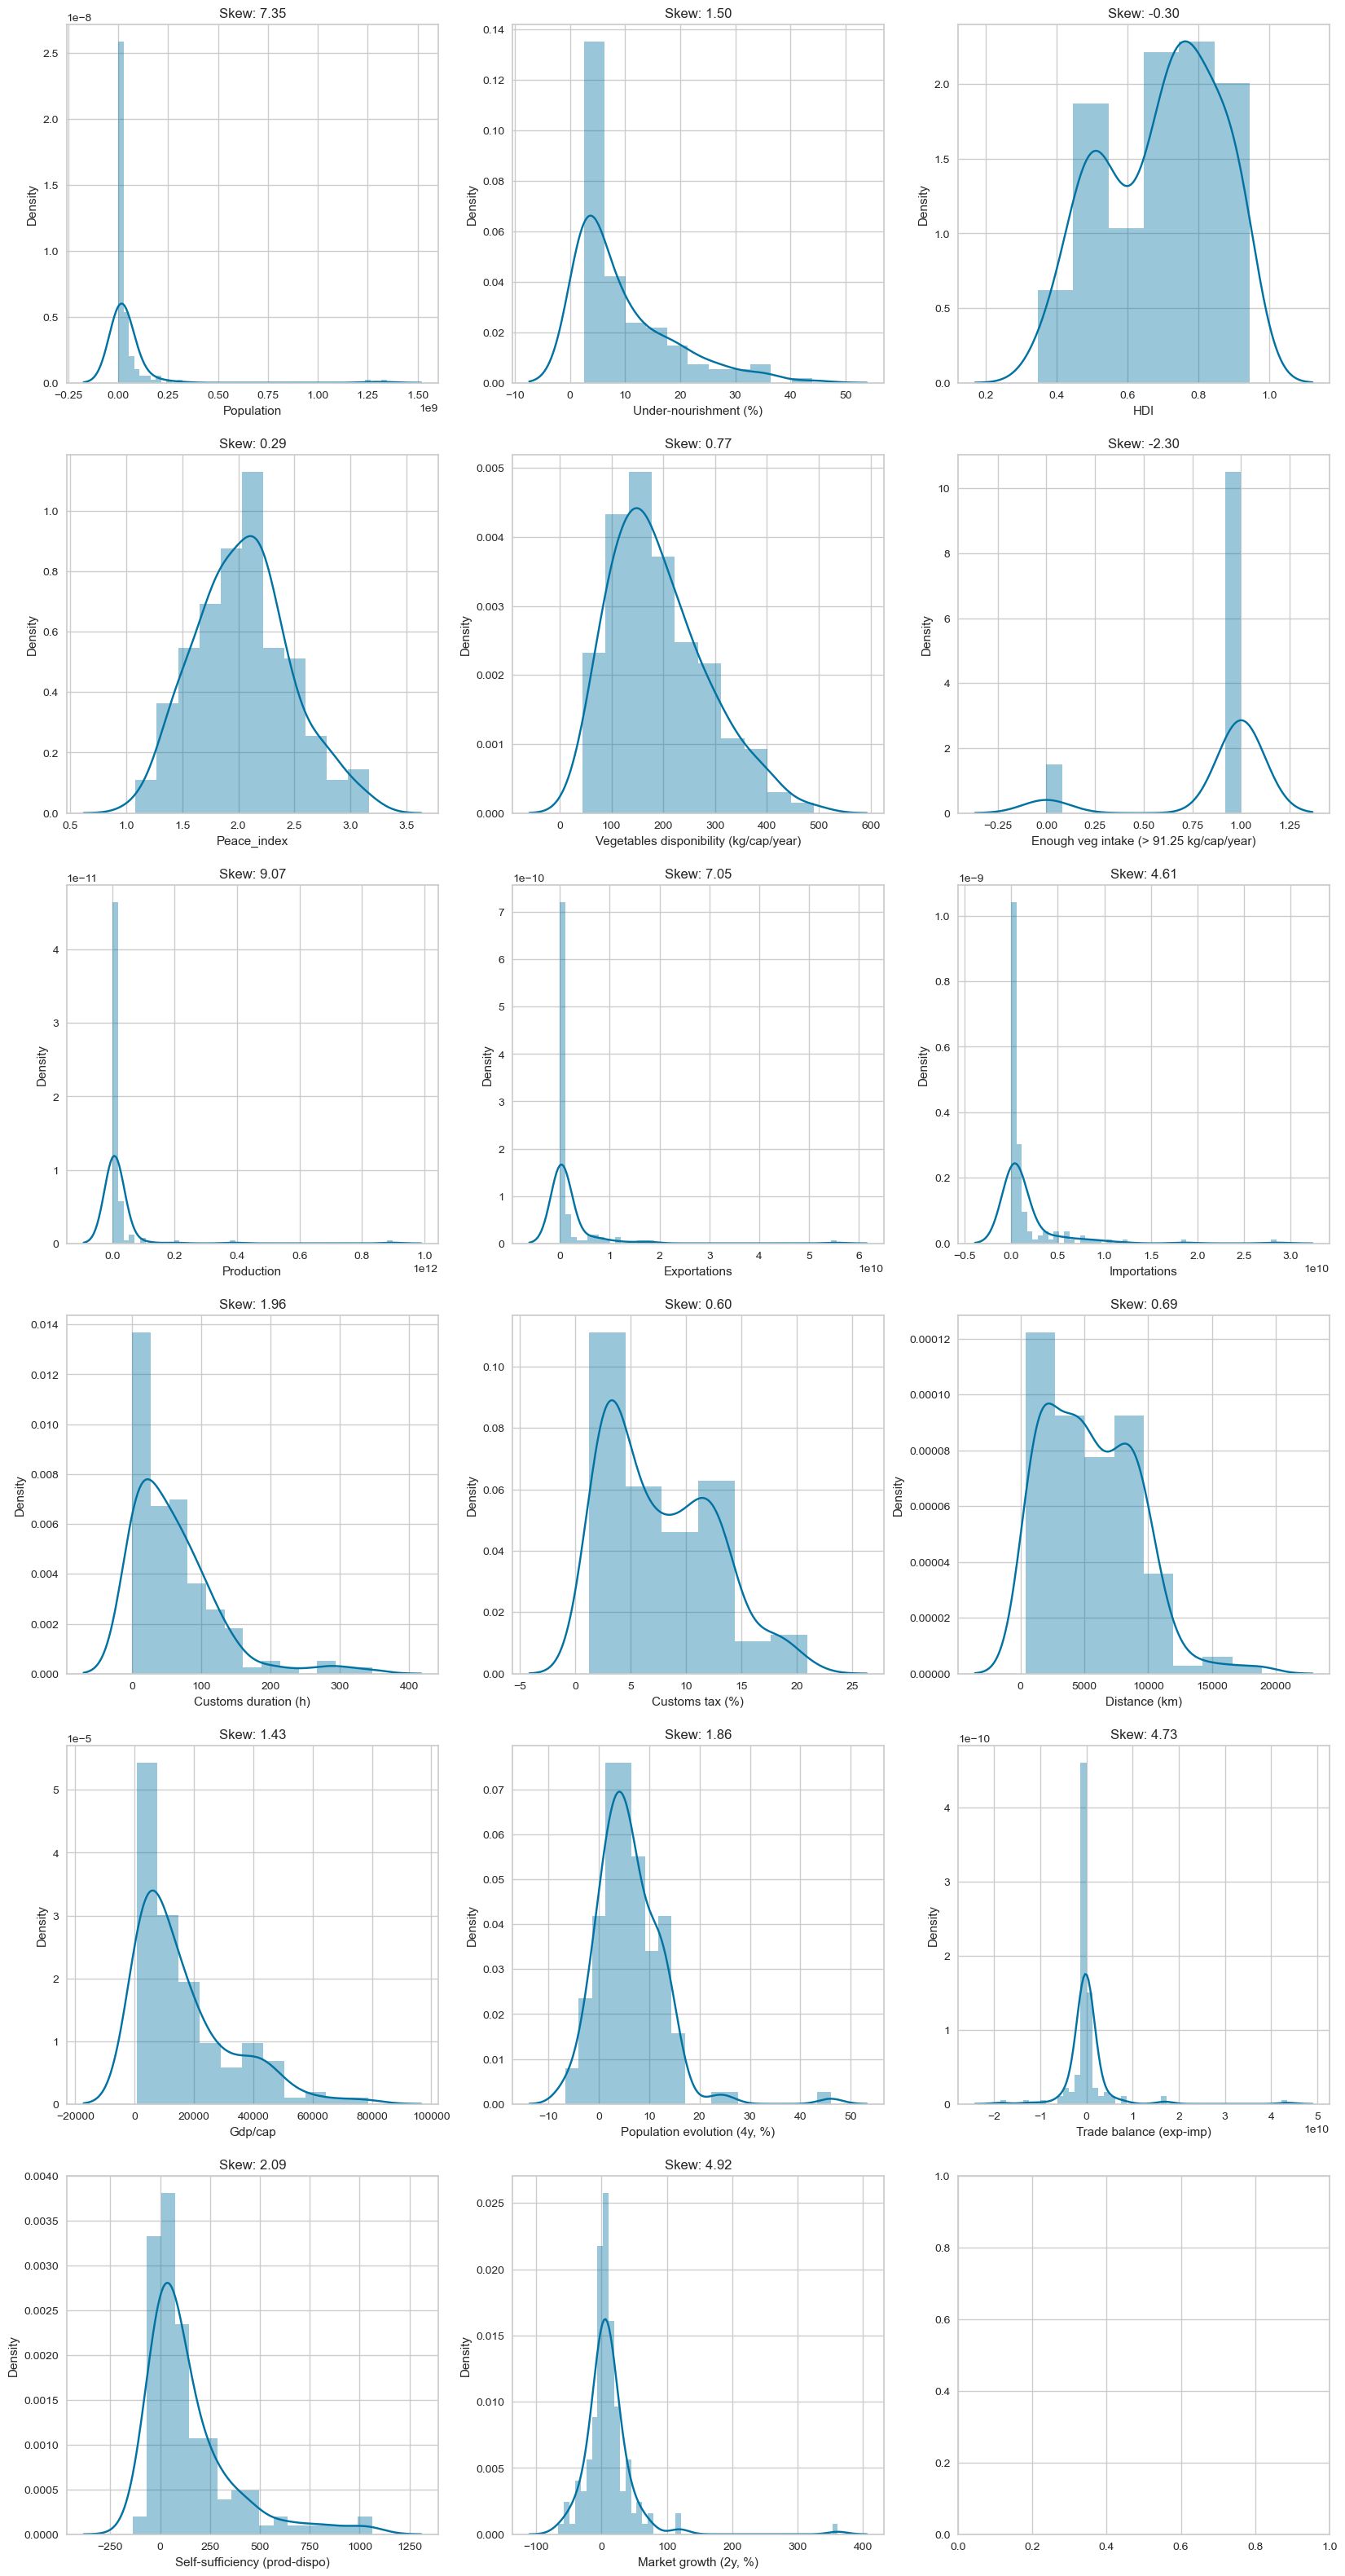

In [12]:
f, a = plt.subplots(6, 3, figsize=(20,40))
a = a.flatten()
for i, col in enumerate(p9_log.columns):
    sns.distplot(p9_log[col], ax=a[i], kde= True).set_title('Skew: {:.2f}'.format(p9_log[col].skew()))
plt.show()

### Calcul de Skew et Kurtosis

In [13]:
#Calculating Skew and Kurtosis 
for i in p9_log.columns:
    kurtosis = round((stats.kurtosis(p9_log[i])), ndigits=2)
    skew = round((stats.skew(p9_log[i])), ndigits=2)
    #print("\nkurtosis :", i, kurtosis) 
    #print("skew", i, skew, "\n")
    print("\n" + "-" * 50 + bold + f"\n{i} : kurtosis {kurtosis}" + end)
    print(bold + f"{i} : skew {skew} \n" + end)
#Interpreting Kurtosis
    if  -0.5 < kurtosis < 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is approximately normal sometimes called mesokurtic distributions')
    elif kurtosis <= -0.5: 
        print (f'A kurtosis of {kurtosis} means the distribution is light-tailed (negative) sometimes called a platykurtic distributions')
    elif kurtosis >= 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution')
#Interpreting Skewness
    if -0.5 < skew < 0.5:
        print (f'A skew of {skew} means the distribution is approx. symmetric')
    elif  -1 < skew < -0.5 or 0.5 < skew < 1.0:
        print (f'A skew of {skew} means the distribution is moderately skewed')
    else:
        print (f'A skew of {skew} means the distribution is highly skewed')


--------------------------------------------------
Population : kurtosis 55.38
Population : skew 7.27 

A kurtosis of 55.38 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 7.27 means the distribution is highly skewed

--------------------------------------------------
Under-nourishment (%) : kurtosis 1.75
Under-nourishment (%) : skew 1.48 

A kurtosis of 1.75 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 1.48 means the distribution is highly skewed

--------------------------------------------------
HDI : kurtosis -1.05
HDI : skew -0.29 

A kurtosis of -1.05 means the distribution is light-tailed (negative) sometimes called a platykurtic distributions
A skew of -0.29 means the distribution is approx. symmetric

--------------------------------------------------
Peace_index : kurtosis -0.16
Peace_index : skew 0.28 

A kurtosis of -0.16 means the distribution is approximatel

### Test de normalité

In [14]:
# calculate
for i in p9_log.columns:
    stat, p = stats.normaltest(p9_log[i])
    print (bold + f'{i}' + end + f': \nStatistic={stat}, p={p}')
   # print ('--'*25) 

# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print ('--'*25) 
    else:
        print('Sample does not look Gaussian (reject H0)')
        print ('--'*25) 

Population: 
Statistic=236.8094469466168, p=3.779914394366186e-52
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Under-nourishment (%): 
Statistic=42.997086184910714, p=4.6057606604334723e-10
Sample does not look Gaussian (reject H0)
--------------------------------------------------
HDI: 
Statistic=31.101235631670257, p=1.763812809910789e-07
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Peace_index: 
Statistic=2.078510319139014, p=0.35371804736667595
Sample looks Gaussian (fail to reject H0)
--------------------------------------------------
Vegetables disponibility (kg/cap/year): 
Statistic=13.040038199544979, p=0.0014736409558782117
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Enough veg intake (> 91.25 kg/cap/year): 
Statistic=74.04248260090148, p=8.353706064443658e-17
Sample does not look Gaussian (reject H0)
---------------------------------

In [15]:
#pip install outliers

In [16]:
#import numpy as np
#from OUTLIERS import smirnov_grubbs as grubbs

#grubbs.max_test(p9.Population, alpha=.01)

### Mise en log des colonnes éligibles

In [17]:
p9.columns

Index(['iso', 'Country', 'Population', 'Under-nourishment (%)', 'HDI',
       'Peace_index', 'Vegetables disponibility (kg/cap/year)',
       'Enough veg intake (> 91.25 kg/cap/year)', 'Production', 'Exportations',
       'Importations', 'Customs duration (h)', 'Customs tax (%)',
       'Distance (km)', 'Gdp/cap', 'Population evolution (4y, %)',
       'Trade balance (exp-imp)', 'Self-sufficiency (prod-dispo)',
       'Market growth (2y, %)'],
      dtype='object')

In [18]:
# Data varies in several magnitudes and has both positive, zero and negative numbers  
# log modulus transform 
log_columns = ['Population', 'Under-nourishment (%)', 'Vegetables disponibility (kg/cap/year)',
              'Production', 'Exportations', 'Importations', 'Customs duration (h)', 'Customs tax (%)',
               'Distance (km)', 'Gdp/cap', 'Trade balance (exp-imp)', 'Population evolution (4y, %)',
               'Self-sufficiency (prod-dispo)', 'Market growth (2y, %)']
for i in log_columns:
    p9_log[i] = np.sign(p9_log[i])*(np.log10(np.abs(p9_log[i])+1))
    
p9_log

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Turkmenistan,6.73,0.72,0.72,2.20,2.25,1,9.07,6.48,7.46,1.83,0.80,3.66,4.04,0.89,-7.41,1.66,-1.83
Malawi,7.18,1.17,0.46,1.73,2.62,1,10.10,8.63,6.90,1.94,1.12,3.87,3.17,1.12,8.62,2.62,-1.75
Argentina,7.62,0.59,0.84,2.01,2.11,1,10.49,10.23,8.00,1.34,1.09,4.04,4.29,0.65,10.23,2.80,-1.75
"Congo, Dem. Rep.",7.84,1.55,0.44,2.98,2.69,1,10.55,6.30,8.09,2.54,1.11,3.78,2.81,1.17,-8.09,1.51,-1.73
Haiti,7.00,1.65,0.51,2.19,2.18,1,9.30,0.00,7.92,1.46,0.87,3.87,3.45,0.82,-7.92,1.70,-1.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Papua New Guinea,6.89,1.41,0.50,2.13,2.29,1,9.22,0.00,7.08,1.63,0.79,4.16,3.47,1.14,-7.08,1.22,1.86
Georgia,6.57,0.96,0.77,2.72,2.15,1,8.89,7.00,8.23,0.85,0.34,3.51,3.92,-0.57,-8.20,1.84,1.86
Liberia,6.62,1.56,0.46,2.04,2.18,1,8.81,0.00,7.38,2.29,1.04,3.67,3.02,1.21,-7.38,0.75,2.08


## **Boxplots**

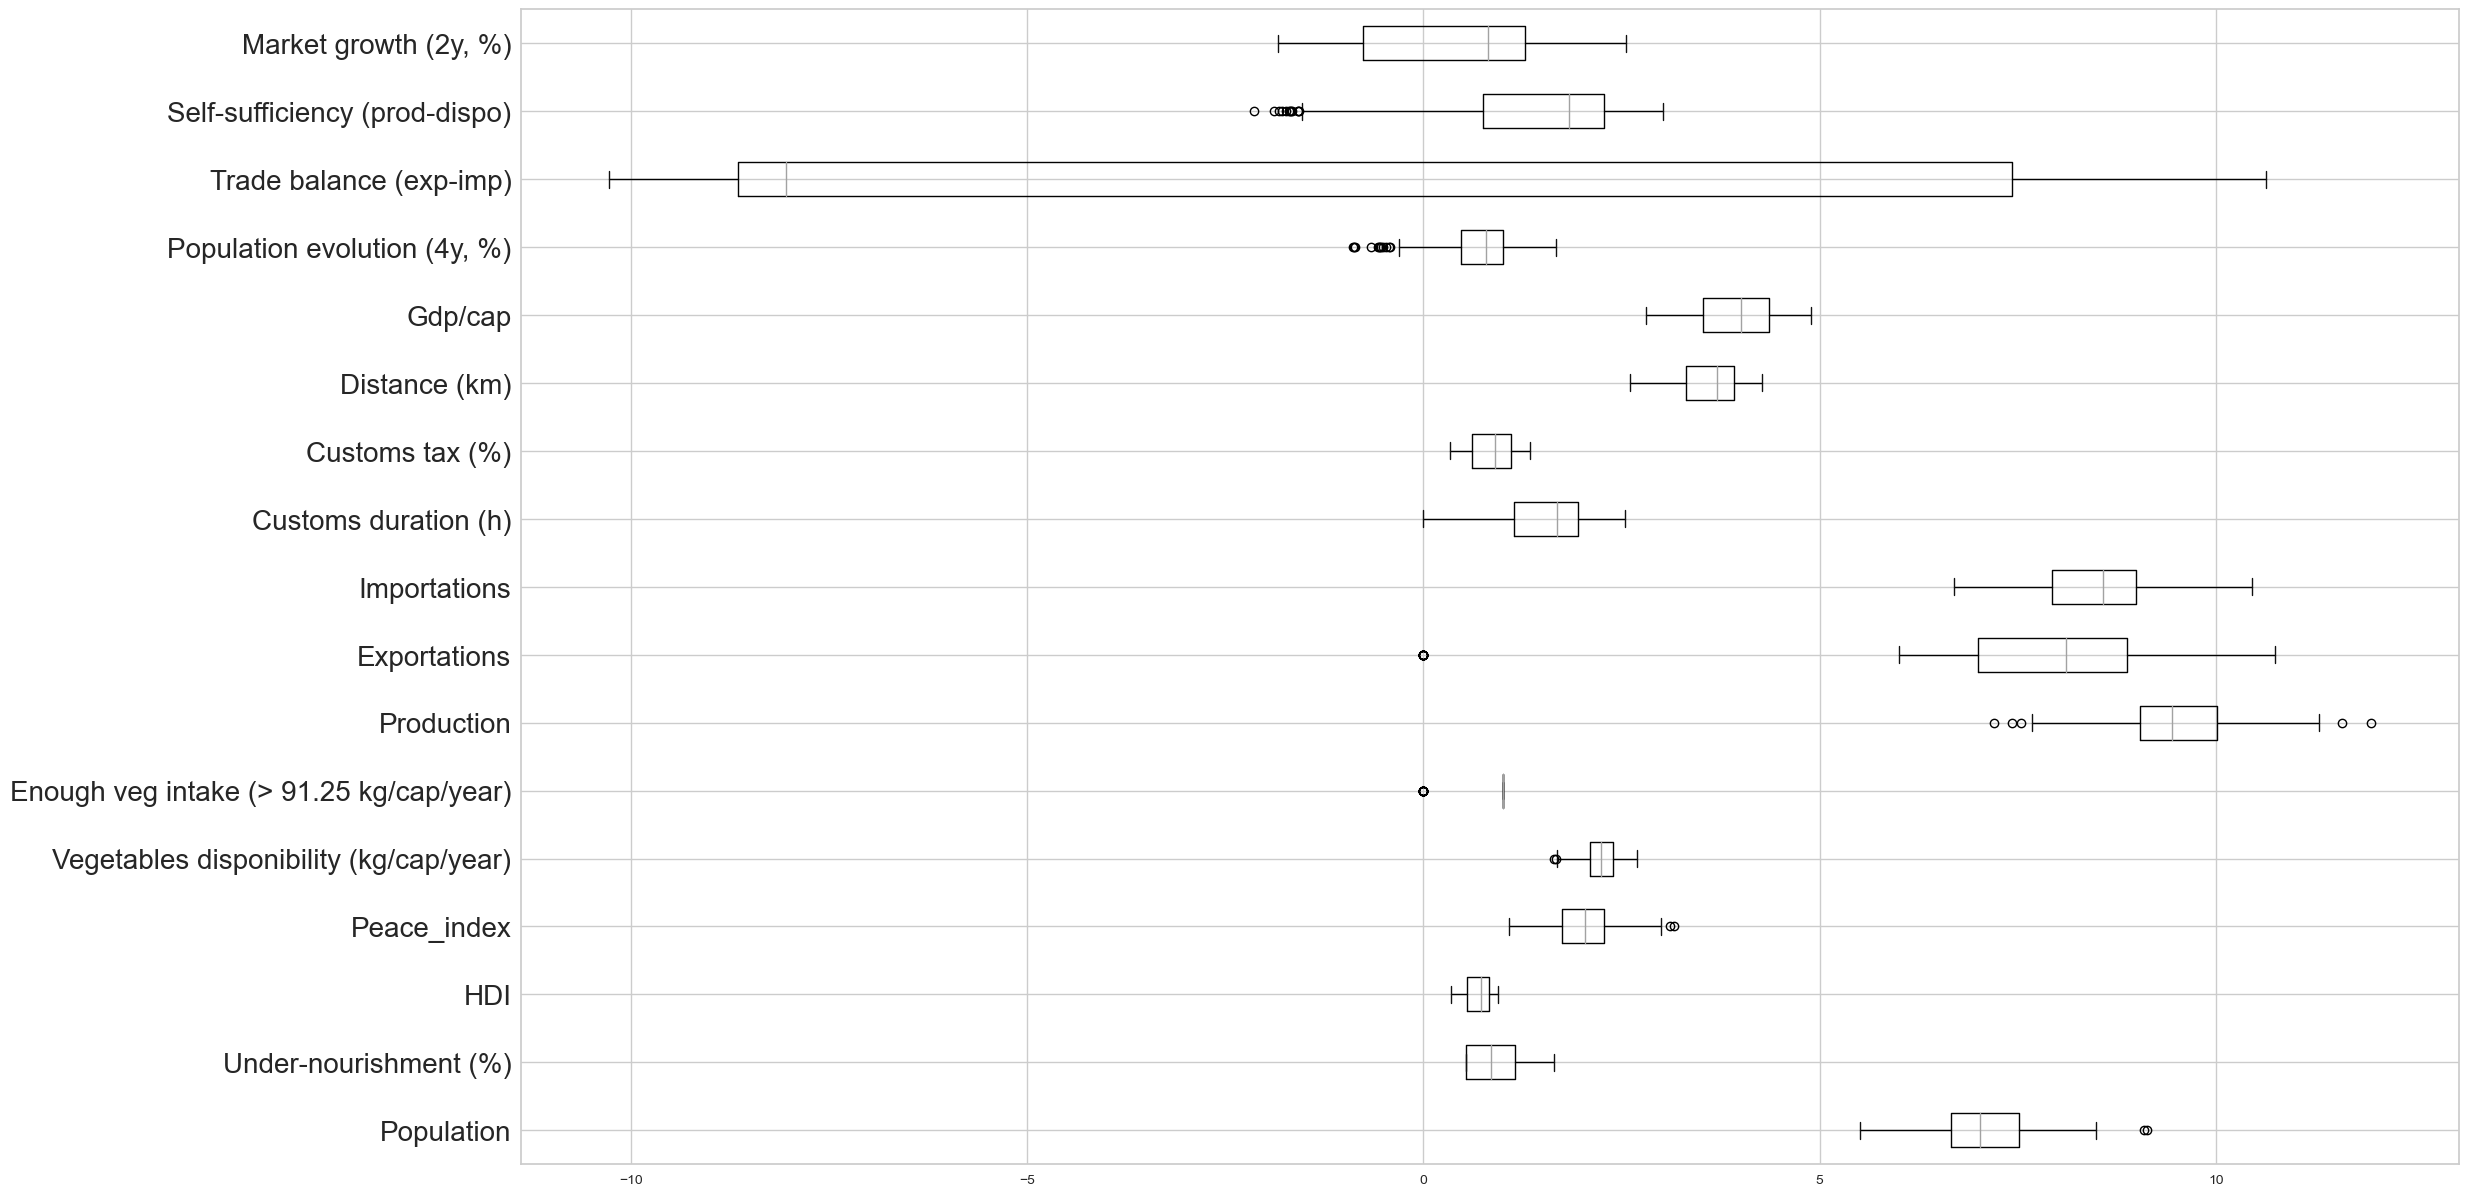

In [19]:
# création boxplots
fig=plt.figure(figsize=(25,15))
p9_log.boxplot(vert=False)
plt.yticks(size=20)
plt.show()

In [20]:
#pd.options.display.max_rows = None

# Vérification des corrélations

<span style="color:red">**Les distributions des variables n'étant pas toutes normales, nous allons utiliser le test de Spearman pour avoir un aperçu des corrélations**</span>

## Corrélation de Spearman

In [21]:
corr = p9_log.corr(method='spearman')
#corr

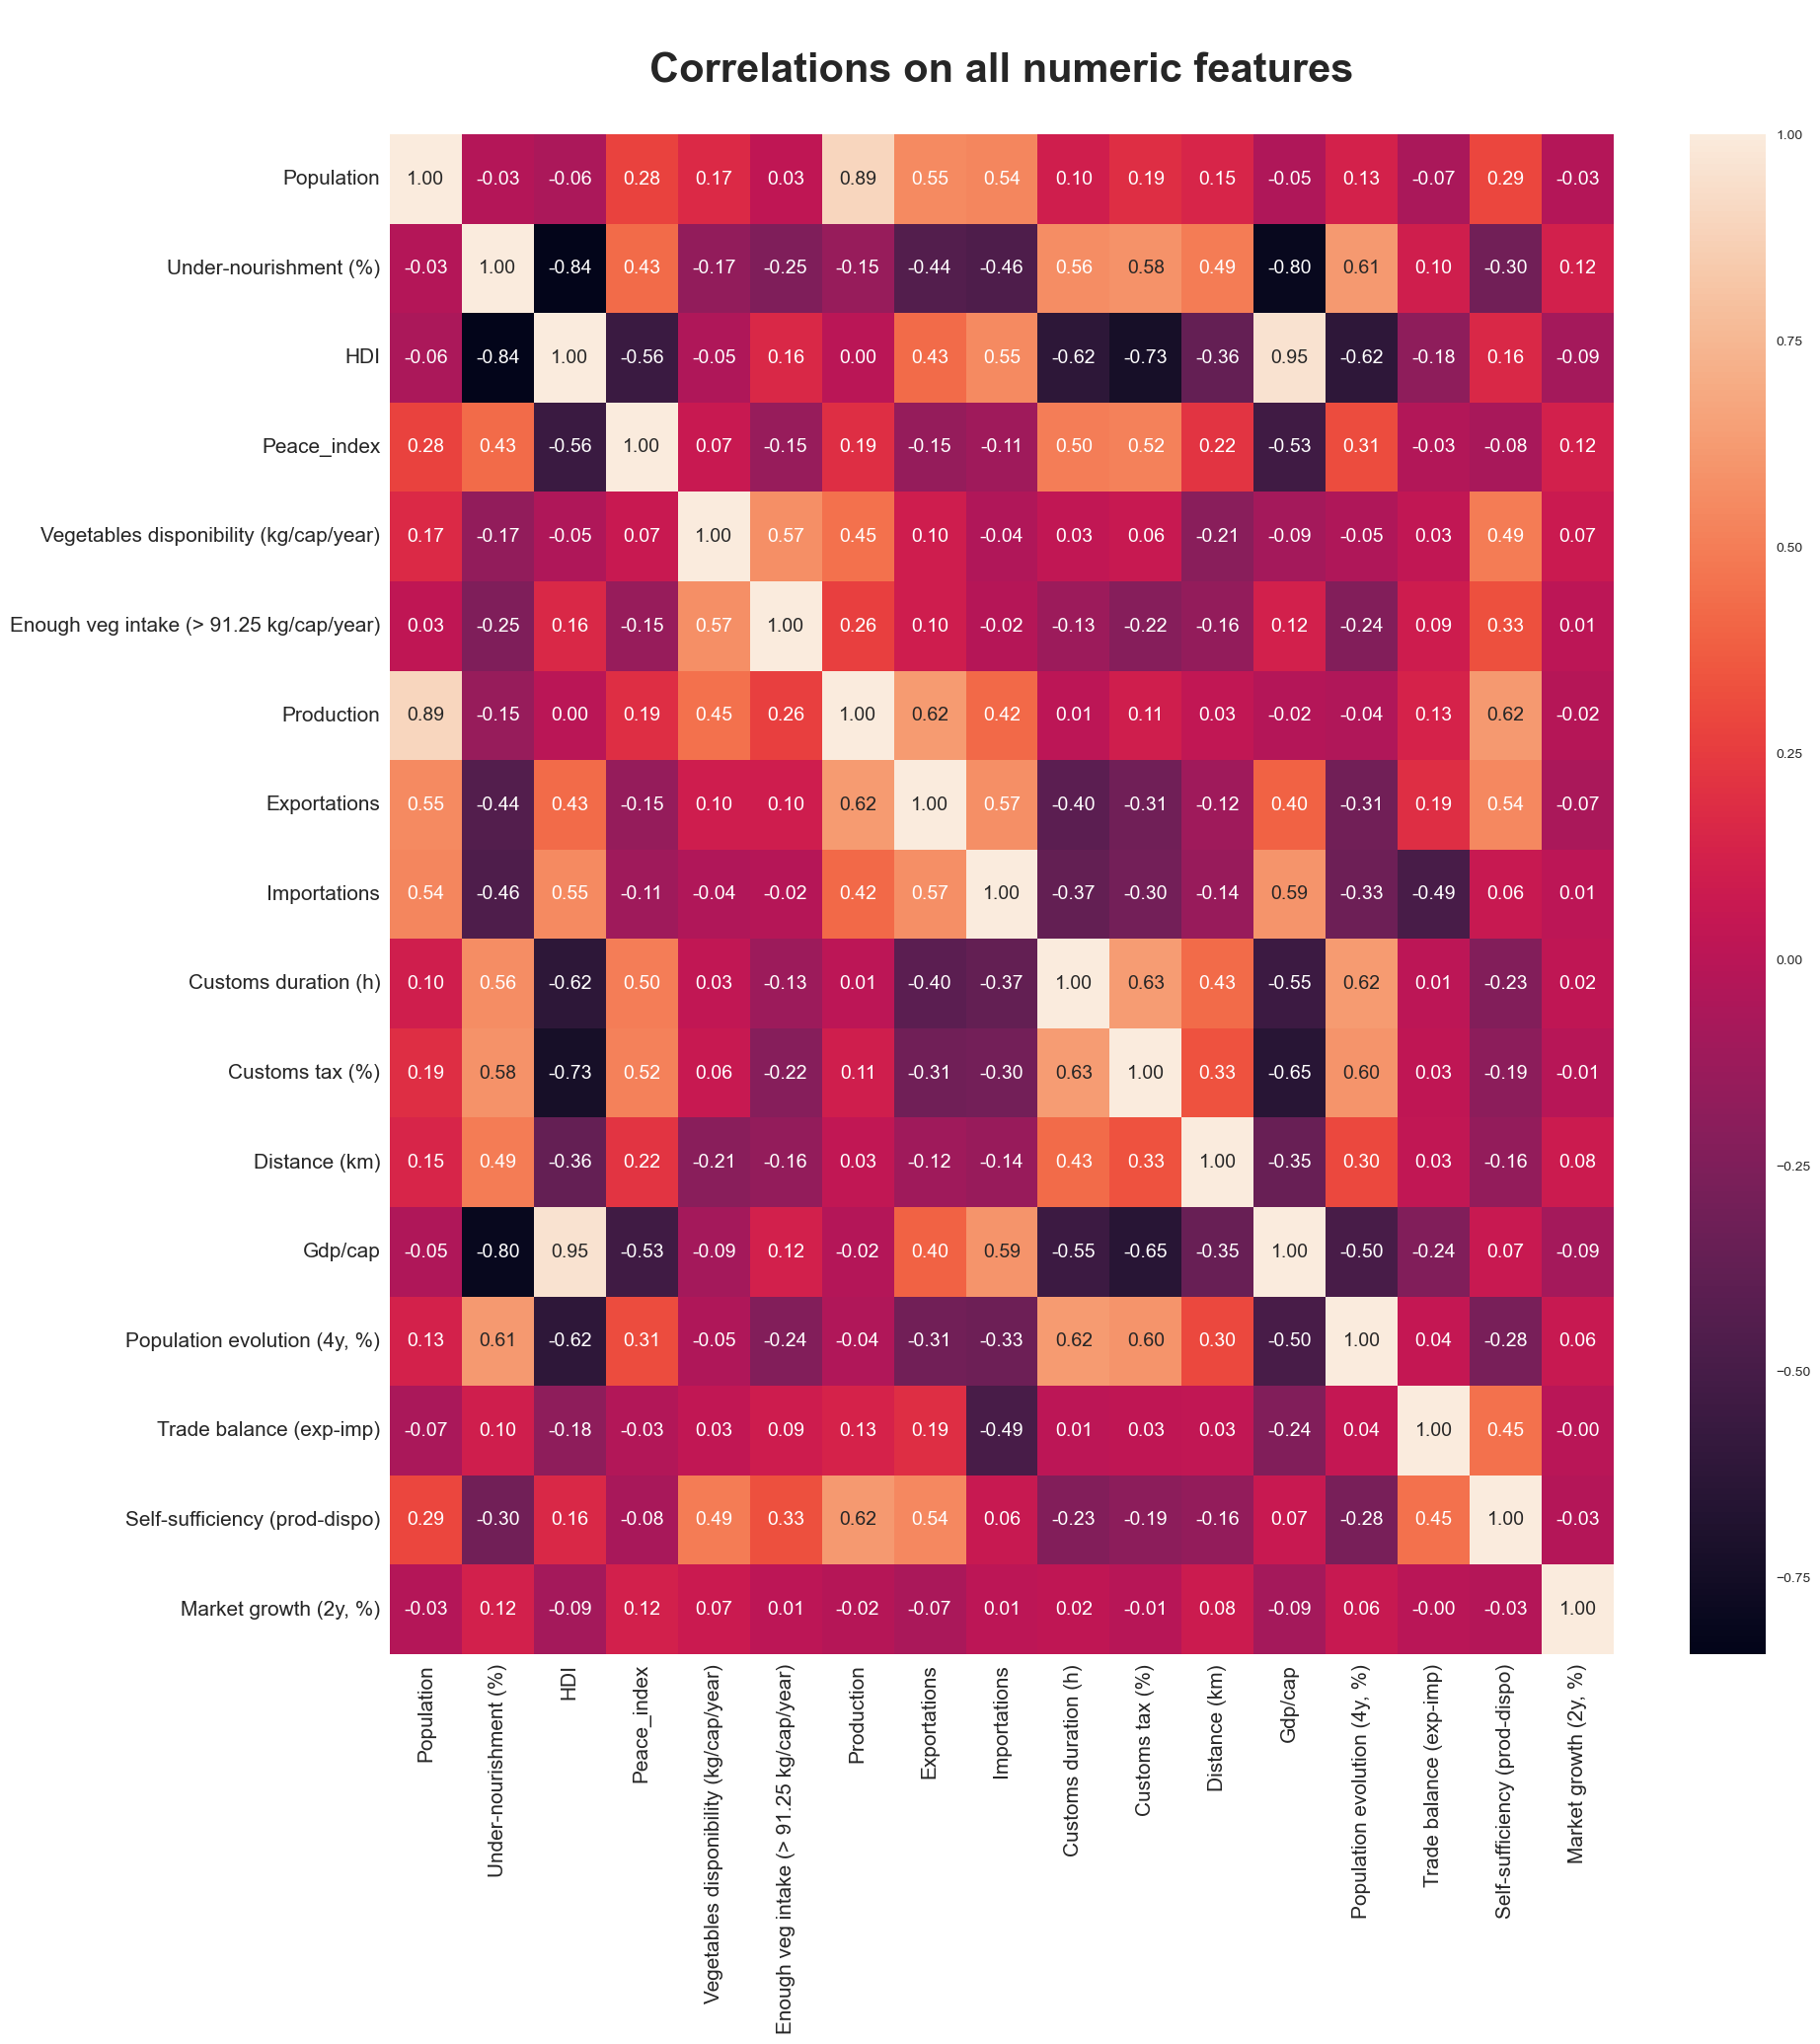

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(p9_log.corr(method='spearman'), annot=True, annot_kws={"size": 14}, fmt=".2f")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nCorrelations on all numeric features\n", size=30, fontweight='bold' )
plt.show()

''

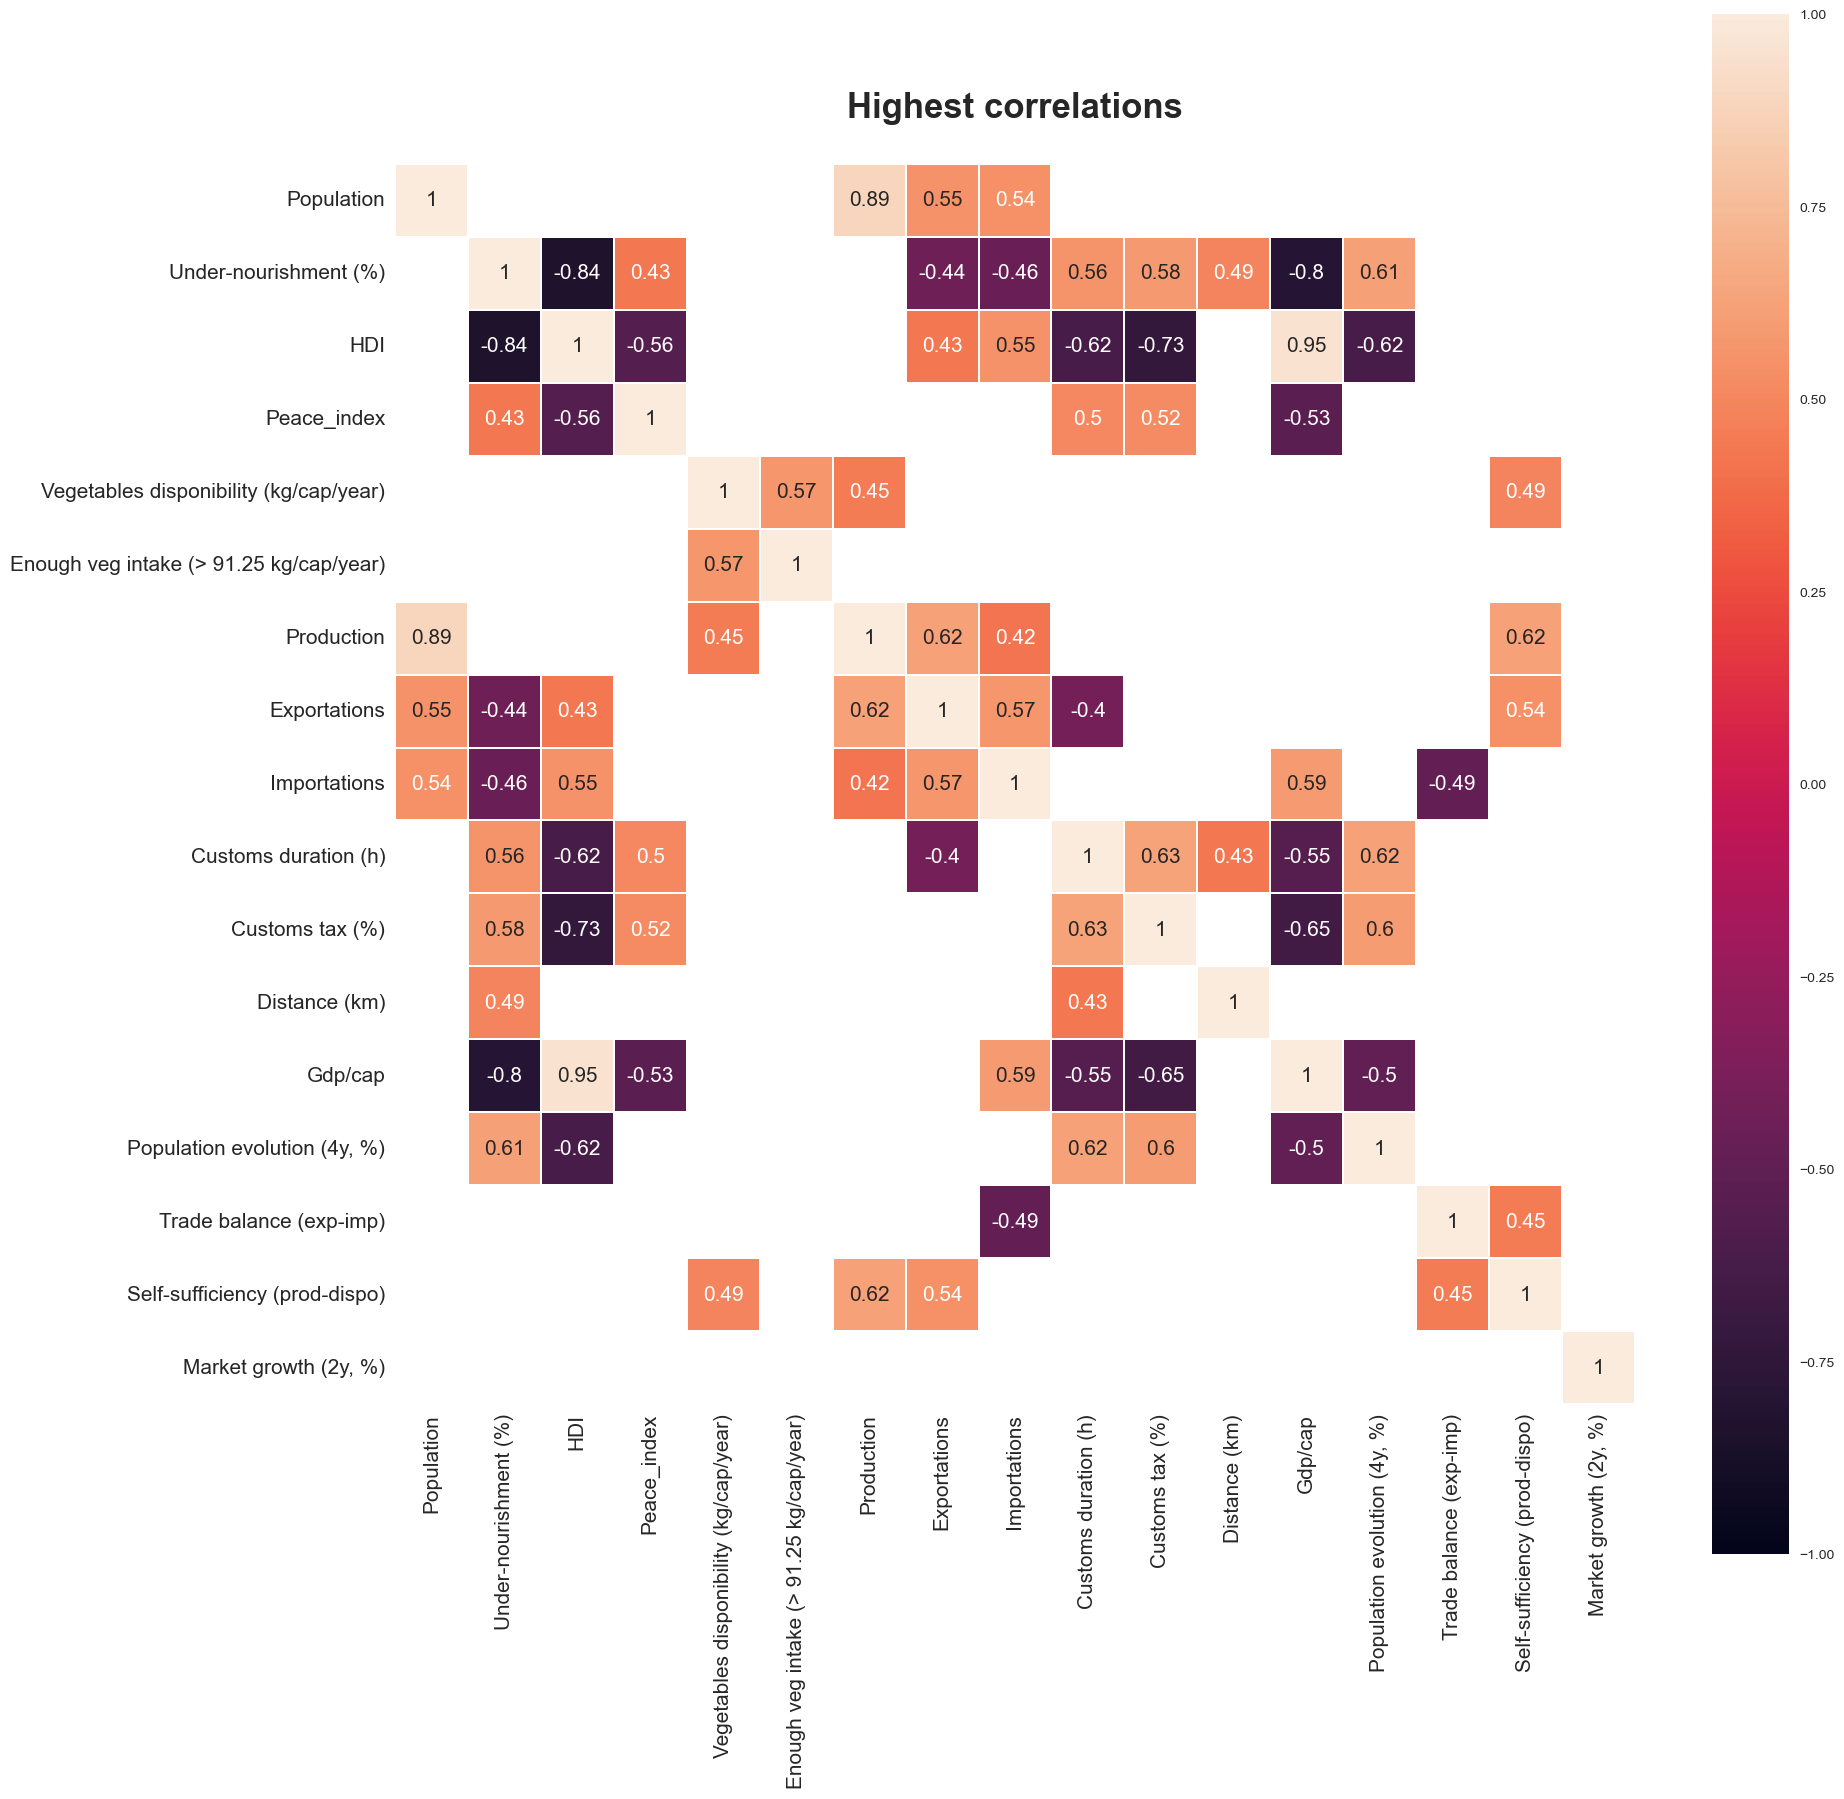

In [23]:
# Beaucoup d'informations, on va visualiser les corrélations les plus élevées
plt.figure(figsize=(20, 20))
sns.heatmap(np.round(corr, 2)[(corr >= 0.4) | (corr <= -0.4)], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 15}, square=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nHighest correlations\n", size=25, fontweight='bold' )
;

# Visionnage du DataFrame final (log) avant analyse

In [24]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "background-color: #DC7633; font-style: italic; color: white; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #DC7633; color: white; text-align: center"
}

properties = {"border": "1px solid black", "width": "90px", "text-align": "center"}

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

p9_log.head(50).style.format(precision=2).highlight_max(axis=0, props='color:white; font-weight:bold; background-color:orange;').set_table_styles(
    styles, [cell_hover, index_names, headers]).set_properties(**properties).set_caption('Log DataFrame')

#p9_log.style.set_sticky(axis='index')
#p9_log.style.set_table_styles([cell_hover, index_names, headers])
#cm = sns.light_palette("orange", as_cmap=True)
#p9_log.style.background_gradient(cmap=cm)

#p9_log.style.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;')

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Turkmenistan,6.73,0.72,0.72,2.20,2.25,1,9.07,6.48,7.46,1.83,0.80,3.66,4.04,0.89,-7.41,1.66,-1.83
Malawi,7.18,1.17,0.46,1.73,2.62,1,10.10,8.63,6.90,1.94,1.12,3.87,3.17,1.12,8.62,2.62,-1.75
Argentina,7.62,0.59,0.84,2.01,2.11,1,10.49,10.23,8.00,1.34,1.09,4.04,4.29,0.65,10.23,2.80,-1.75
"Congo, Dem. Rep.",7.84,1.55,0.44,2.98,2.69,1,10.55,6.30,8.09,2.54,1.11,3.78,2.81,1.17,-8.09,1.51,-1.73
Haiti,7.00,1.65,0.51,2.19,2.18,1,9.30,0.00,7.92,1.46,0.87,3.87,3.45,0.82,-7.92,1.70,-1.66
Rwanda,7.02,1.55,0.50,2.15,2.60,1,9.74,7.43,8.03,1.99,1.05,3.78,3.15,1.08,-7.90,2.10,-1.60
Bangladesh,8.18,1.23,0.56,2.22,1.91,0,10.14,7.80,9.16,2.23,1.17,3.90,3.49,0.72,-9.14,1.12,-1.58
"Iran, Islamic Rep.",7.88,0.86,0.75,2.56,2.45,1,10.42,9.23,9.58,2.03,1.34,3.63,4.28,0.82,-9.33,1.80,-1.57
Vietnam,7.95,1.03,0.67,1.84,2.03,1,10.39,9.83,9.11,1.79,0.92,4.00,3.76,0.72,9.74,2.23,-1.56


# Exportations des fichiers

In [25]:
p9.to_excel('../src/p9_2011_cleaned.xlsx', index=False)
p9_log.to_excel('../src/p9_log_2011_cleaned.xlsx', index=True)
print("Exportation terminée")

Exportation terminée
